In [1]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
# Specify name of circuit and variant investigated
circuit_n='circuit14'
variant='2nd'
# Specifiy number of parameter sets in parameterset file to be loaded
n_param_sets = 1000000

print(f'Circuit:{circuit_n}, Variant:{variant}')
lhs_df = pickle.load( open(modellingpath + '/3954/paper/input/lhs_parameterfiles/df_%s_variant%s_%rparametersets.pkl'%(circuit_n,variant,100000), "rb"))
# lhs_df = pickle.load( open(modellingpath + '/3954/paper/input/lhs_parameterfiles/df_circuit14_variant2nd_100000parametersets', 'rb'))

balanced_lsa_df= pickle.load( open(modellingpath + '/3954/paper/out/analytical/lsa_dataframes/all_dataframes/lsa_df_%s_variant%s_%rparametersets_balanced.pkl'%(circuit_n,variant,n_param_sets), "rb"))
print(balanced_lsa_df['system_class'].value_counts())

variant='fitted2'
n_param_sets = 1000000
# fitDf = pickle.load( open(modellingpath + '/3954/paper/input/fitted_parameterfiles/df_%s_variant%s_%rparametersets.pkl'%(circuit_n,variant,n_param_sets), "rb"))

fitDf = pickle.load( open(modellingpath + '/3954/paper/out/analytical/lsa_dataframes/all_dataframes/lsa_df_%s_variant%s_%sparametersets_balancedSemiBalanced.pkl'%(circuit_n,variant,n_param_sets), "rb"))
print(fitDf['system_class'].value_counts())


Circuit:circuit14, Variant:2nd
simple stable           1009508
hopf                      92009
complex unstable          82471
no steady state            8100
turing I oscillatory        171
turing I hopf                47
turing I                      5
Name: system_class, dtype: int64


FileNotFoundError: [Errno 2] No such file or directory: '/Users/mo2016/Documents/modelling/3954/paper/out/analytical/lsa_dataframes/all_dataframes/lsa_df_circuit14_variantfitted2_1000000parametersets_balancedSemiBalanced.pkl'

In [4]:
lhs_df

,Dr,Va,Vb,Vc,Vd,Ve,Vf,Kda,Kub,Keb,...,Kce,muLVA,muASV,nvd,nub,nda,nfe,nee,neb,nce
0,0.082940,84.447317,330.553613,497.146942,363.149088,30.206486,93.586620,36.473575,8.765497,18.139275,...,4.478828,4.493274,1.0,2.0,1.0,2.0,5.0,4.0,4.0,3.0
1,7.802435,118.663011,954.462457,130.489938,40.209003,21.668176,45.298296,357.127074,44.917369,2.087321,...,5.498358,4.071618,1.0,2.0,1.0,2.0,5.0,4.0,4.0,3.0
2,5.417374,357.557440,238.259448,84.012322,36.478543,21.890223,20.309136,6.263999,4.972653,2.253335,...,3.395120,4.126554,1.0,2.0,1.0,2.0,5.0,4.0,4.0,3.0
3,13.330967,27.307727,24.164058,113.307299,531.915427,106.067450,500.578540,778.542445,147.598218,6.177014,...,600.431871,3.818174,1.0,2.0,1.0,2.0,5.0,4.0,4.0,3.0
4,0.096827,88.421019,193.653272,687.218742,122.469179,626.544602,390.668057,238.685890,31.447608,42.520387,...,77.038698,3.328071,1.0,2.0,1.0,2.0,5.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5.791278,494.038030,260.012791,385.389575,16.044608,301.428256,696.928126,2.440398,7.206582,78.824670,...,103.404303,3.609388,1.0,2.0,1.0,2.0,5.0,4.0,4.0,3.0
99996,0.130440,11.346973,110.327637,56.752366,30.547338,152.770869,183.822594,3.684769,253.079144,1.912228,...,63.343787,4.101243,1.0,2.0,1.0,2.0,5.0,4.0,4.0,3.0
99997,7.409200,49.845492,16.291888,413.203586,31.852419,99.317912,315.983891,18.789542,272.117955,77.865947,...,630.384192,4.472732,1.0,2.0,1.0,2.0,5.0,4.0,4.0,3.0
99998,97.229557,40.578520,381.271666,922.244011,249.624423,875.713025,109.033973,7.034217,27.815786,273.701967,...,3.700004,3.908611,1.0,2.0,1.0,2.0,5.0,4.0,4.0,3.0


TypeError: No loop matching the specified signature and casting was found for ufunc add

Error in callback <function flush_figures at 0x151c5d9dd160> (for post_execute):


KeyboardInterrupt: 

In [ ]:
instabilities = ['turing I', 'turing II', 'turing I hopf', 'turing I oscillatory', 'turing II hopf','hopf', 'turing semi-hopf']  
instabilities_df = balanced_lsa_df.loc[balanced_lsa_df['system_class'].isin(instabilities)]

turingStates = ['turing I','turing I oscillatory']  
turing_df = balanced_lsa_df.loc[balanced_lsa_df['system_class'].isin(turingStates)]
zeroSignChanges_df = balanced_lsa_df.loc[balanced_lsa_df['system_class'].isin(['Zero sign changes'])]
turing_df       

,,Dr,Va,Vb,Vc,Vd,Ve,Vf,Kda,Kub,Keb,...,nee,neb,nce,balance,ss_n,ss_list,ss_class,system_class,maxeig,complex_dispersion
3966,1,0.033591,525.870788,192.596543,389.848725,281.336797,106.70254,91.260505,1.189362,190.099619,1.632053,...,4.0,4.0,3.0,Balanced,2.0,"[4.2635, 4.0055, 3.4194, 15.0508, 1.3025, 5.5578]",stable spiral,turing I oscillatory,0.305952+0.000000j,True
4085,1,0.030486,15.688245,36.129485,980.317753,80.781394,148.068925,459.066671,2.786076,8.148615,1.120108,...,4.0,4.0,3.0,Balanced,3.0,"[1.5855, 3.8608, 37.5857, 14.1502, 1.1357, 75....",stable spiral,turing I oscillatory,0.437501+0.000000j,True
10335,0,0.04055,38.232059,18.291744,285.6555,131.493832,24.996987,16.34304,8.568025,18.359186,9.519621,...,4.0,4.0,3.0,Balanced,3.0,"[5.3791, 4.4687, 33.7194, 23.8223, 6.3258, 3.8...",stable spiral,turing I oscillatory,0.634882+0.000000j,True
15760,1,0.047993,570.432033,366.254962,975.682321,735.347987,47.357686,22.33761,1.205247,10.248279,17.991124,...,4.0,4.0,3.0,Balanced,2.0,"[4.1214, 5.7553, 6.3389, 16.2484, 38.5548, 1.4...",stable spiral,turing I oscillatory,0.368924+0.000000j,True
20766,0,0.011926,203.761037,463.940452,373.269337,33.65683,35.312855,10.68041,1.002875,57.528117,1.015736,...,4.0,4.0,3.0,Balanced,3.0,"[1.8757, 6.8003, 2.6042, 15.2649, 1.1289, 5.5267]",stable spiral,turing I oscillatory,0.018485+0.000000j,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974496,1,0.078051,604.235295,730.952934,50.031117,213.461241,449.902398,620.723609,6.741239,27.751596,1.562021,...,4.0,4.0,3.0,Balanced,3.0,"[2.677, 42.0675, 1.1389, 127.7821, 1.3548, 369...",stable spiral,turing I oscillatory,0.223218+0.000000j,True
983665,0,0.012135,178.351788,75.804113,15.884564,147.686856,11.15878,22.905494,9.363008,56.658395,9.247058,...,4.0,4.0,3.0,Balanced,1.0,"[15.3089, 7.1826, 2.2744, 31.7023, 10.4132, 5....",stable spiral,turing I oscillatory,0.278265+0.000000j,True
985253,0,0.016053,78.216495,14.652087,876.68531,508.937765,214.45374,13.654328,41.315232,6.359916,32.752138,...,4.0,4.0,3.0,Balanced,3.0,"[2.6585, 4.8618, 19.5887, 280.7076, 19.2137, 8...",stable spiral,turing I oscillatory,0.004971+0.000000j,True
992274,1,0.061082,736.600537,17.744173,47.392415,47.651823,86.467244,161.903381,4.866655,198.513256,4.21932,...,4.0,4.0,3.0,Balanced,3.0,"[30.3248, 2.9116, 2.8867, 23.9005, 2.9221, 78....",stable spiral,turing I oscillatory,0.310925+0.000000j,True


In [ ]:
pfitDict = {'Vc': 99.99999998437673,
'Vd': 8.845204237579598,
'Ve': 99.99999902098732,
'Vf': 8.394996554940189,
'Kvd': 0.9400832873750722,
'Kda': 4.142114110177617,
'Kce': 4.342277899710668,
'Kfe': 0.4319218458202641}


paramList = pfitDict.keys()

#copy pandas df to new df
# fitDf = lhs_df.copy()
# for param in paramList:
#     fitDf[param] = pfitDict[param]
# fitDf
# paramList = ['Vc', 'Vd', 'Vf', 'Kvd', 'Kda', 'Kfe','Kce']


/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-5-a2d457219ec0>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[count].set_yticklabels(axs[count].get_yticks(), size = 20)
<ipython-input-5-a2d457219ec0>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[count].set_xticklabels(axs[count].get_xticks(), size = 20)


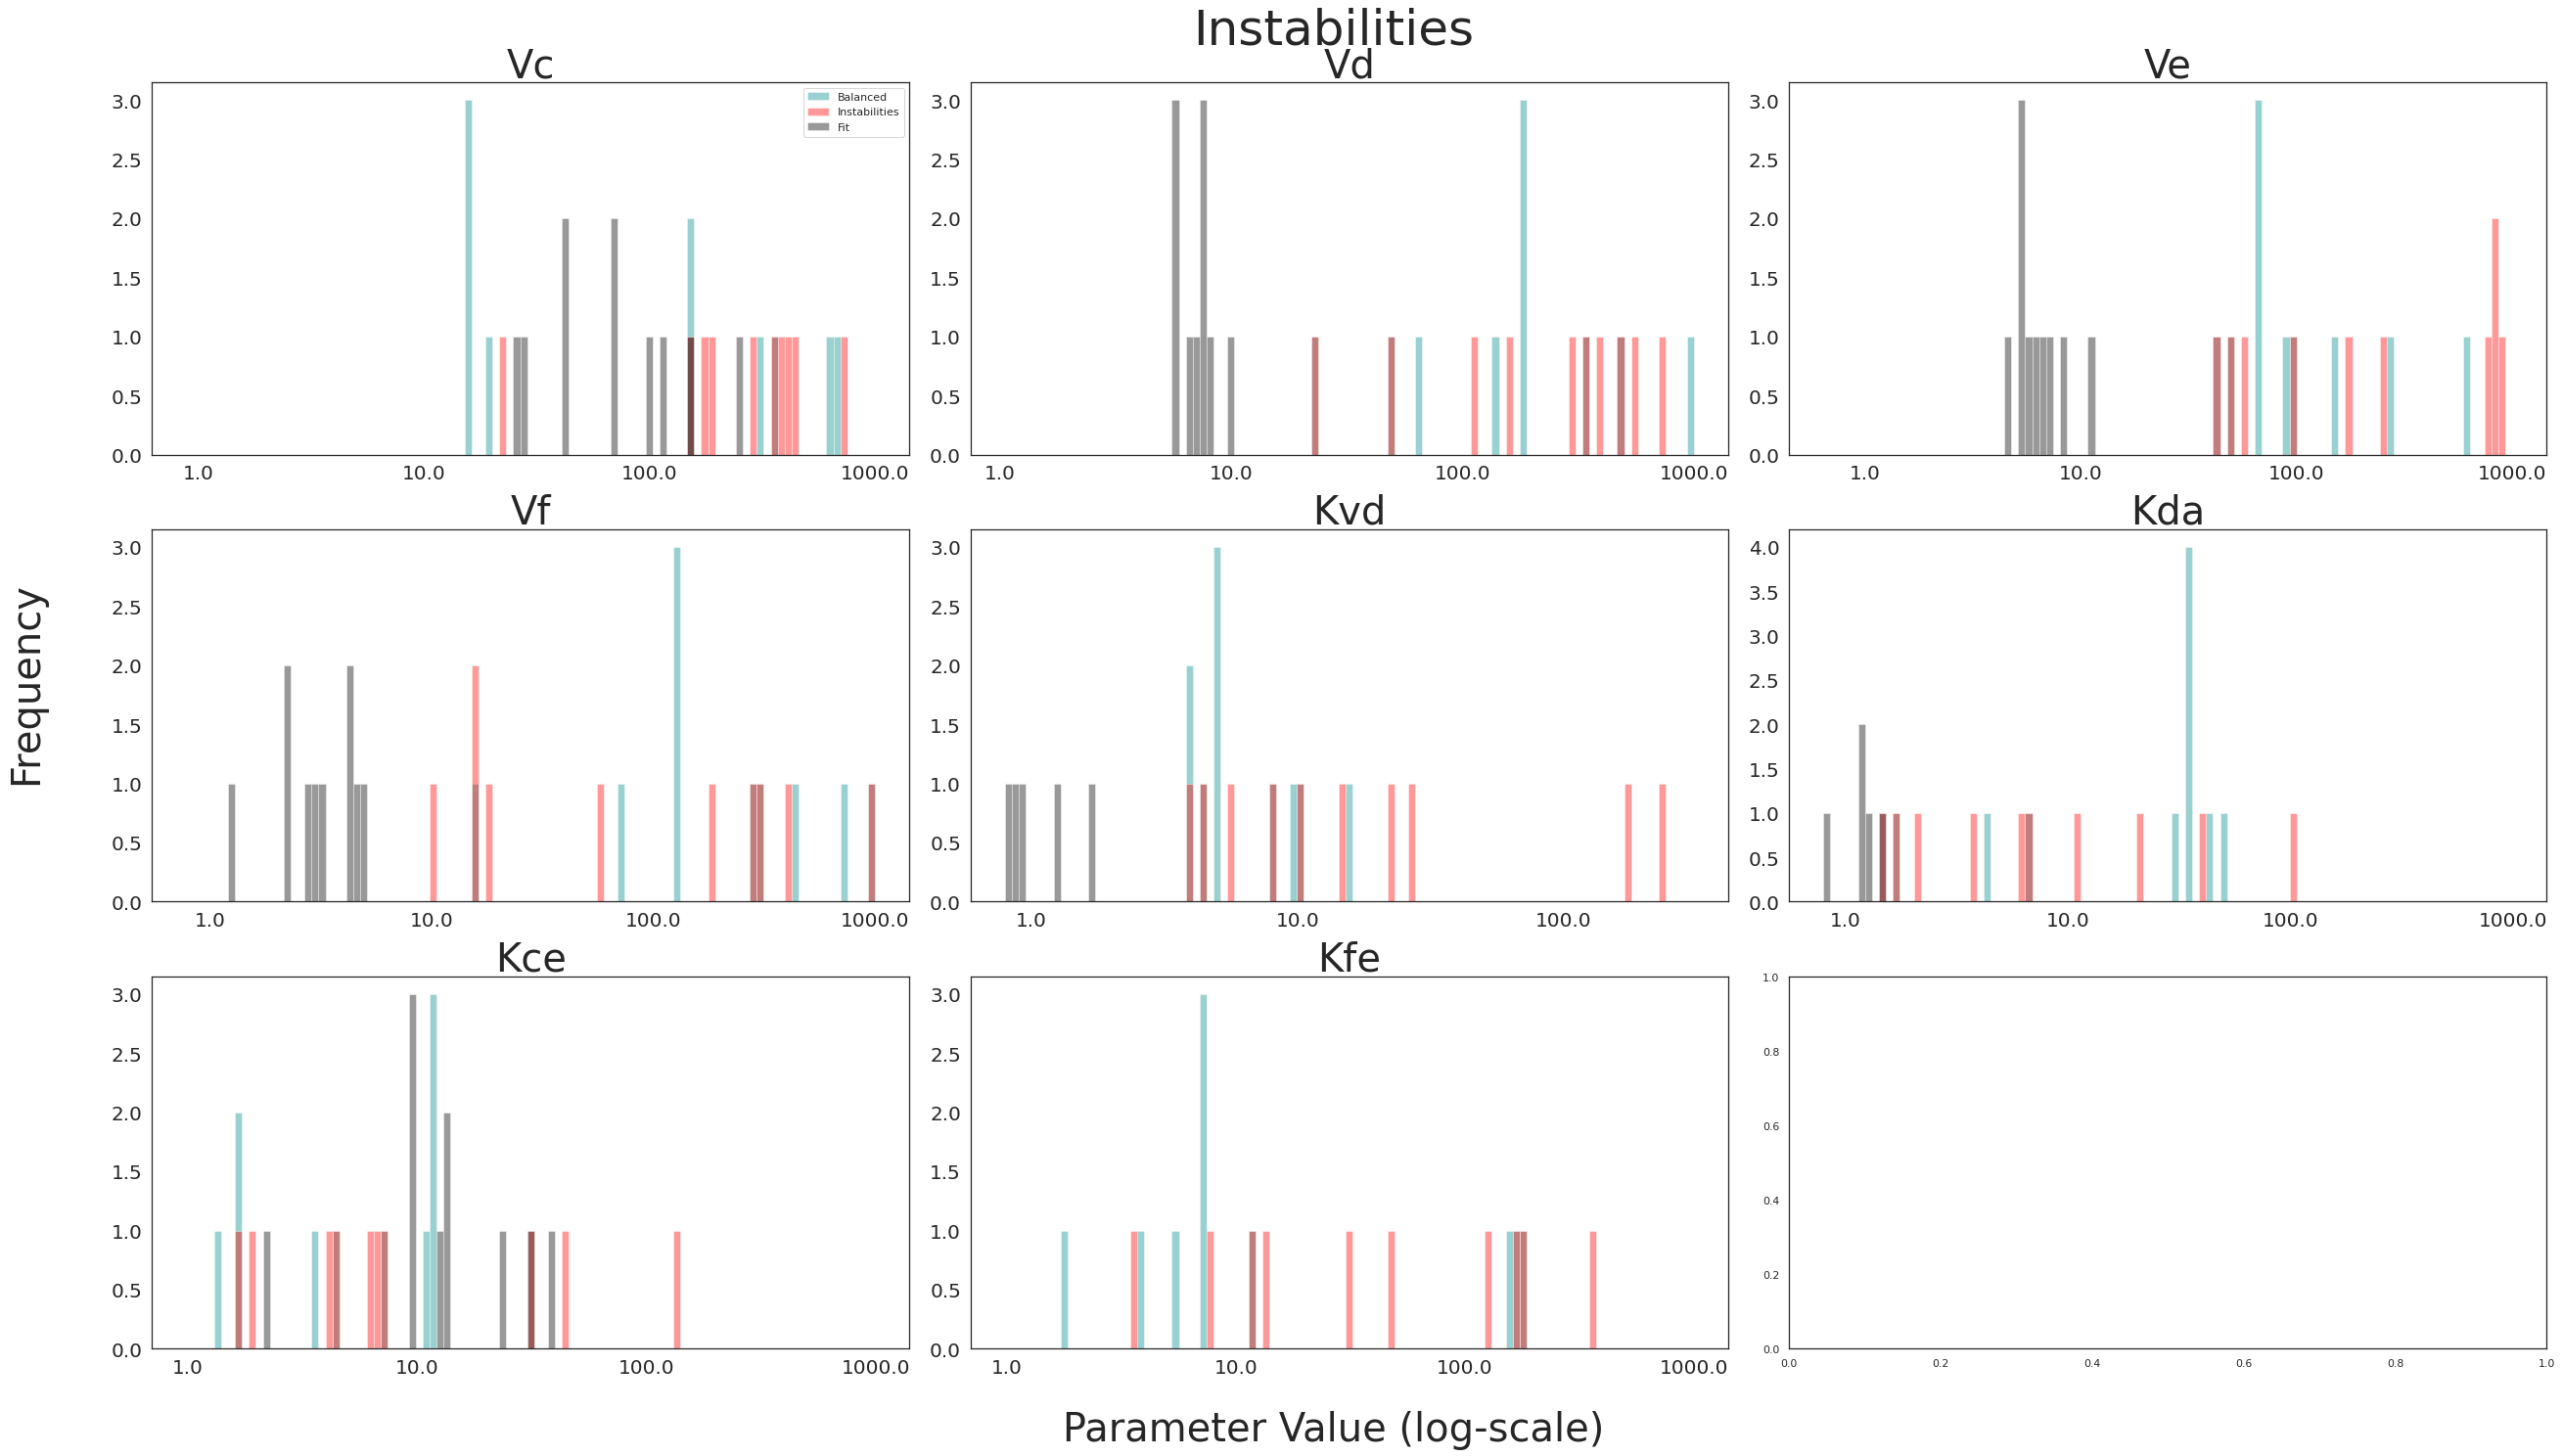

/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-5-a2d457219ec0>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[count].set_yticklabels(axs[count].get_yticks(), size = 20)
<ipython-input-5-a2d457219ec0>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[count].set_xticklabels(axs[count].get_xticks(), size = 20)


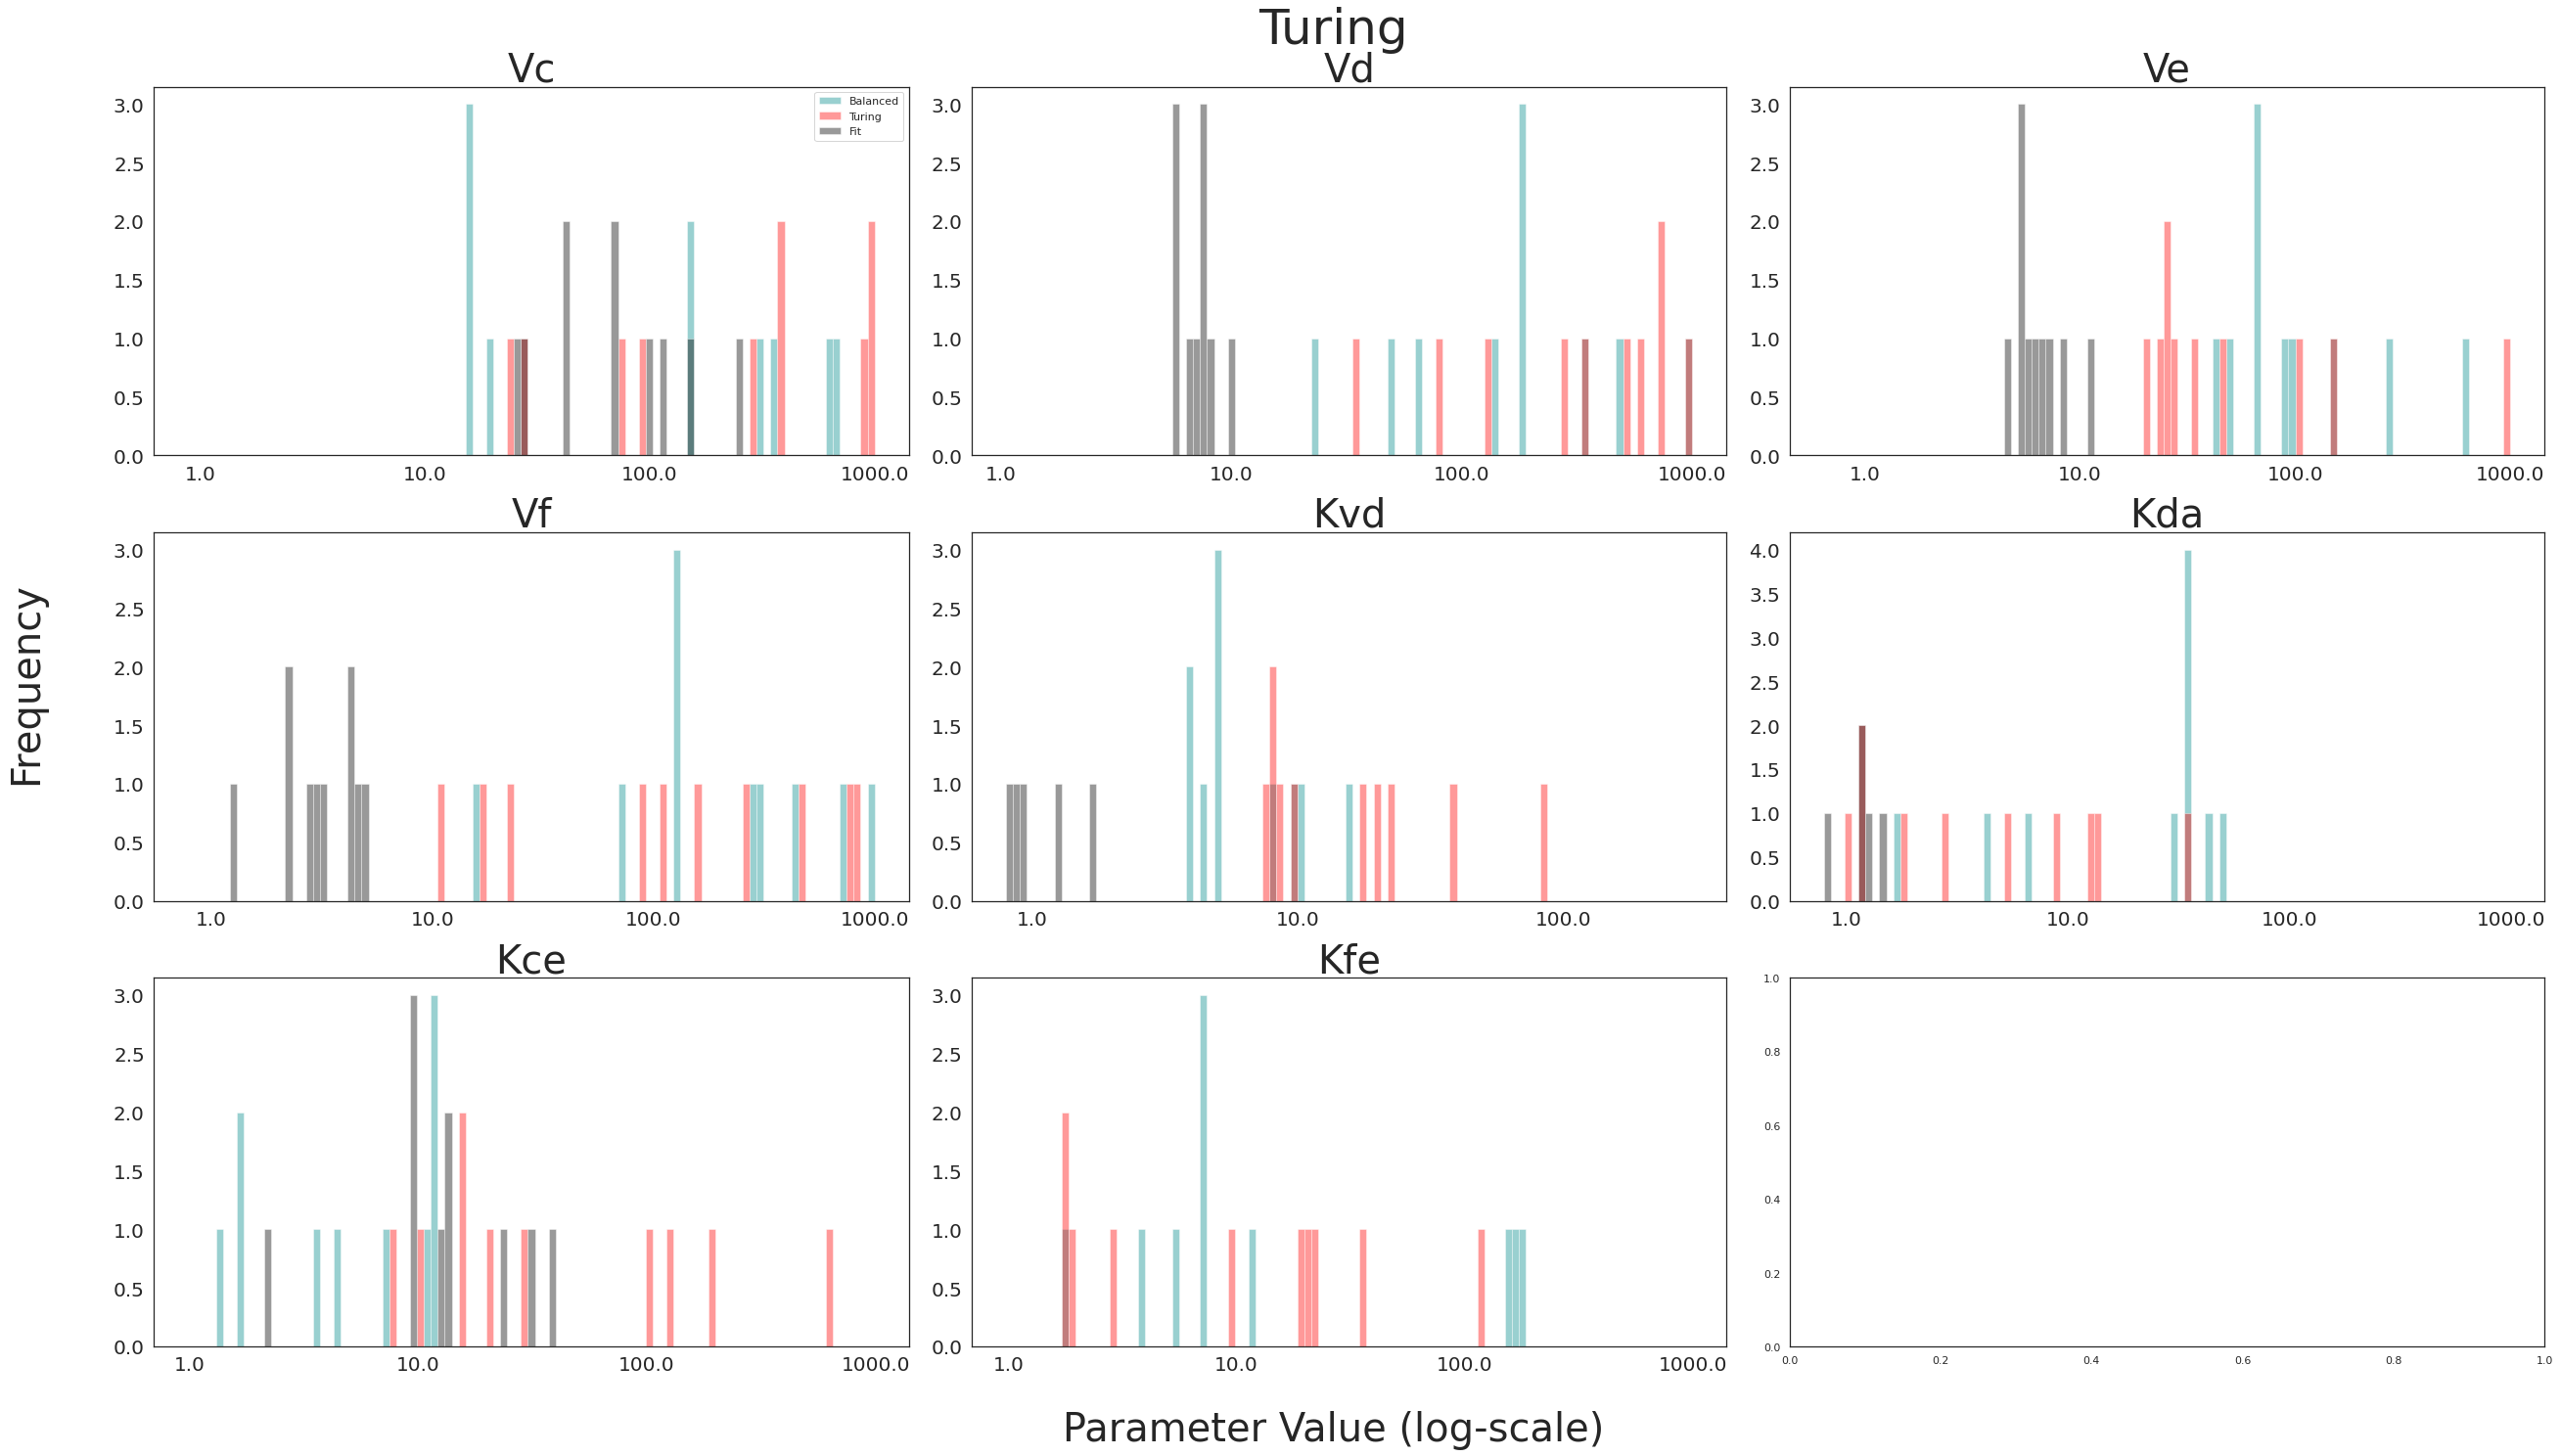

In [ ]:
from scipy import stats
def paramsHistogram(balancedDf,specificDf,fitDf,title,crop=2000):
    sns.set(style="white", palette="muted", color_codes=False)

    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(35,20))
    axs = axs.flatten()
    palette = sns.diverging_palette(10, 220, n=2)
    # paramList=['Dr','VA','VB','VC','VD','VE','VF', 'Kda','Kab', 'Keb', 'Kbd', 'Kfe', 'Kee', 'Kce', 'muLVA']
    df_concat = pd.concat([balancedDf,specificDf,fitDf])
    # df_concat[(np.abs(stats.zscore(df_concat)) < 3).all(axis=1)]
    # df_concat[np.abs(df_concat.Data-df_concat.Data.mean()) <= (3*df_concat.Data.std())]

    for count, parameter in enumerate(paramList):
    # for count, parameter in enumerate(lsa_df.columns[:24]):
        q = df_concat[parameter].quantile(0.3)
        df_concat[df_concat[parameter] < q]
        LogMin, LogMax = np.log10(df_concat.iloc[:,count].min()),np.log10(df_concat.iloc[:,count].max())
        newBins = np.logspace(LogMin/10, LogMax,100)
        sns.distplot(balancedDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'darkcyan', ax = axs[count], label='Balanced')
        sns.distplot(specificDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'red', ax = axs[count], label=title)
        sns.distplot(fitDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'black', ax = axs[count], label='Fit')

        axs[count].set_xscale('log')
        axs[count].set_yticklabels(axs[count].get_yticks(), size = 20)
        axs[count].set_xticklabels(axs[count].get_xticks(), size = 20)

        axs[count].set_title(str(parameter),fontsize=40)
    #     axs[count].set_xlim(0)
        axs[0].legend()
    # fig.legend()
    fig.suptitle(title, fontsize=50)
    fig.tight_layout()
    fig.text(0.5,-0.03, "Parameter Value (log-scale)", ha="center", va="center",  fontsize=40)
    fig.text(-0.03,0.5, "Frequency", ha="center", va="center", rotation=90 ,fontsize=40)
    plt.show()


balanced_lsa_df = balanced_lsa_df[paramList]
instabilities_df = instabilities_df[paramList]
turing_df = turing_df[paramList]
fitDf = fitDf[paramList]

paramsHistogram(balanced_lsa_df,instabilities_df,fitDf, 'Instabilities',crop=10)
# paramsHistogram(lhs_df,balanced_lsa_df,instabilities_df,fitDf, 'Instabilities',crop=100)
# paramsHistogram(lsa_df,turing_df, 'Turing',crop=200)
paramsHistogram(balanced_lsa_df,turing_df,fitDf, 'Turing',crop=10)
# paramsHistogram(lsa_df,zeroSignChanges_df, 'Diffusion independent stability',crop=2000)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


import pandas as pd
# del concatenated_df

# def concatenate_dataframes(df1, df2, df3,crop=100):
def concatenate_dataframes(df1, df2,crop=100):
    # Create a new column in each data frame to specify the original source
    df1['source'] =  'df1'
    df2['source'] = 'df2'
    # df3['a'] = "blue"
    
    # Concatenate the data frames vertically
    # concatenated_df = pd.concat([df1.iloc[:crop], df2.iloc[:crop], df3.iloc[:crop]], ignore_index=True)
    return pd.concat([df1.iloc[:crop], df2.iloc[:crop]], ignore_index=True)


# concatenated_df = concatenate_dataframes(balanced_lsa_df, instabilities_df, turing_df, crop=5)
concat_df = concatenate_dataframes(balanced_lsa_df, instabilities_df, crop=5)
# concatenated_df

# Create the pairplot with hue and store the AxesSubplot object
sns.pairplot(concat_df, hue="source")

# # Apply logarithmic scale to the axes
# plot.set(xscale="log", yscale="log")

# # Display the plot
# plt.show()



<ipython-input-30-a7415324994d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['source'] = 'df2'


TypeError: No loop matching the specified signature and casting was found for ufunc add

Error in callback <function flush_figures at 0x151c5d9dd160> (for post_execute):


KeyboardInterrupt: 

In [ ]:
concat_df

,Dr,Va,Vb,Vc,Vd,Ve,Vf,Kda,Kub,Keb,...,neb,nce,balance,ss_n,ss_list,ss_class,system_class,maxeig,complex_dispersion,source
0,0.143023,52.840864,797.836313,19.177823,47.425968,98.603756,702.461106,30.246197,32.166023,5.117991,...,4.0,3.0,Balanced,1.0,"[15.8335, 263.7729, 6.3836, 48.4153, 1.0157, 7...",stable point,simple stable,-1.000795+0.000000j,True,df1
1,0.045471,100.575081,145.183479,304.345002,135.452353,155.554552,999.253725,48.591258,31.697148,39.97613,...,4.0,3.0,Balanced,1.0,"[14.6981, 46.9943, 42.4511, 122.3716, 1.0, 896...",stable spiral,simple stable,-1.764431+0.447145j,True,df1
2,1.257643,93.55435,292.385504,348.703942,475.522215,41.53285,301.720176,6.484979,3.660737,2.094126,...,4.0,3.0,Balanced,1.0,"[1.6001, 1.9994, 3.2366, 80.7134, 6.4136, 51.5...",unstable spiral,hopf,1.009568+4.963138j,True,df1
3,24.275399,38.600819,383.005511,154.001815,63.448029,267.681731,281.612052,34.344444,7.448186,53.779745,...,4.0,3.0,Balanced,1.0,"[9.542, 216.1027, 35.0791, 64.4263, 1.0015, 28...",stable point,simple stable,-1.000860+0.000000j,True,df1
4,0.052086,110.427113,423.692866,694.379864,350.47799,87.049174,444.717315,44.820783,11.087726,3.83214,...,4.0,3.0,Balanced,1.0,"[2.8083, 86.2293, 12.3705, 347.3784, 1.0, 440....",stable point,simple stable,-1.049982+0.000000j,True,df1
5,1.257643,93.55435,292.385504,348.703942,475.522215,41.53285,301.720176,6.484979,3.660737,2.094126,...,4.0,3.0,Balanced,1.0,"[1.6001, 1.9994, 3.2366, 80.7134, 6.4136, 51.5...",unstable spiral,hopf,1.009568+4.963138j,True,df2
6,0.010671,61.196677,317.682934,152.37357,22.861383,50.083035,15.742803,1.716874,1.031309,1.702466,...,4.0,3.0,Balanced,1.0,"[6.9887, 3.8779, 15.9112, 5.2128, 5.3178, 3.901]",unstable spiral,hopf,1.383045+4.989512j,True,df2
7,2.088433,139.38882,287.558375,396.665822,398.680053,830.053672,15.299051,20.941217,17.069662,1.103783,...,4.0,3.0,Balanced,1.0,"[12.5487, 6.5638, 33.8649, 69.6736, 2.36, 3.6353]",unstable spiral,hopf,1.580872+5.332989j,True,df2
8,0.046801,73.912849,101.828299,286.928173,50.523882,58.211075,18.698195,1.493555,12.689506,1.971681,...,4.0,3.0,Balanced,1.0,"[5.7678, 7.0374, 19.5084, 5.6878, 2.8344, 2.7349]",unstable spiral,hopf,1.398582+4.694023j,True,df2
9,49.855297,22.30197,46.433764,22.795132,161.468516,825.175058,178.815437,102.740128,9.004227,12.571207,...,4.0,3.0,Balanced,1.0,"[14.4271, 3.9333, 14.724, 83.5275, 21.6192, 92...",unstable spiral,hopf,0.308937+3.928841j,True,df2


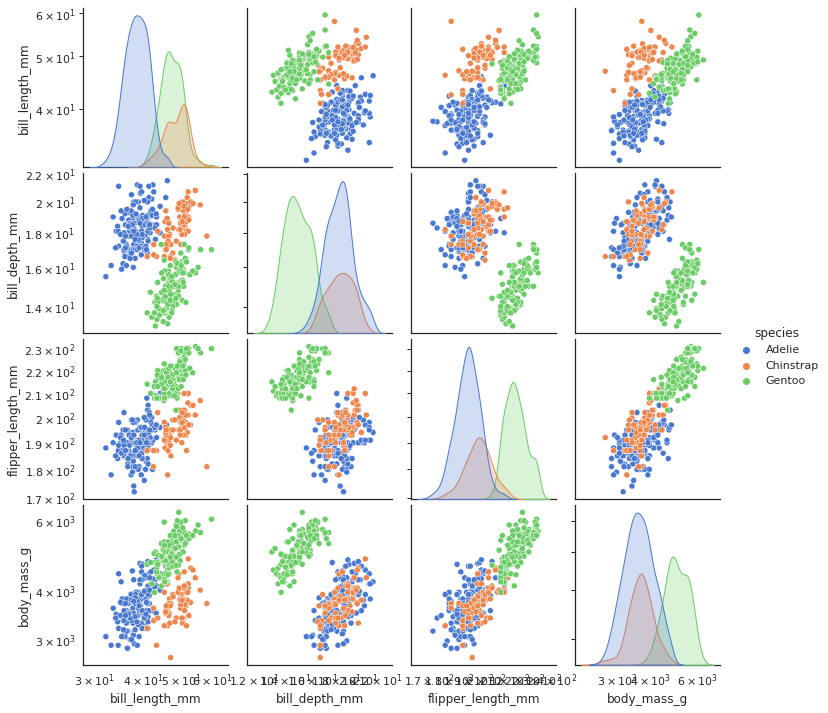

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset from seaborn
penguins = sns.load_dataset("penguins")

# Create the pairplot with hue and store the AxesSubplot object
plot = sns.pairplot(penguins, hue="species")

# Apply logarithmic scale to the axes
plot.set(xscale="log", yscale="log")

# Display the plot
plt.show()

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
